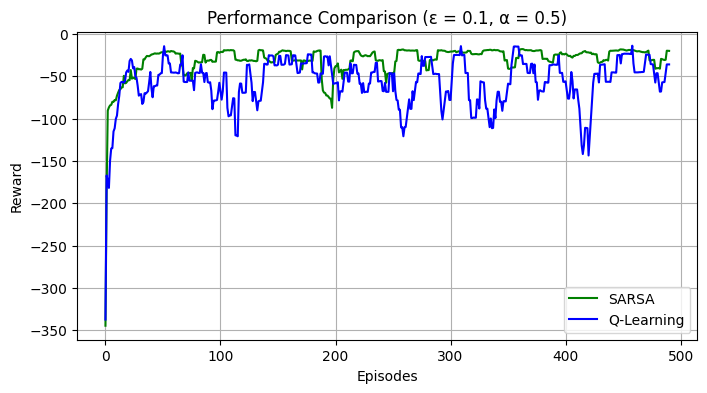

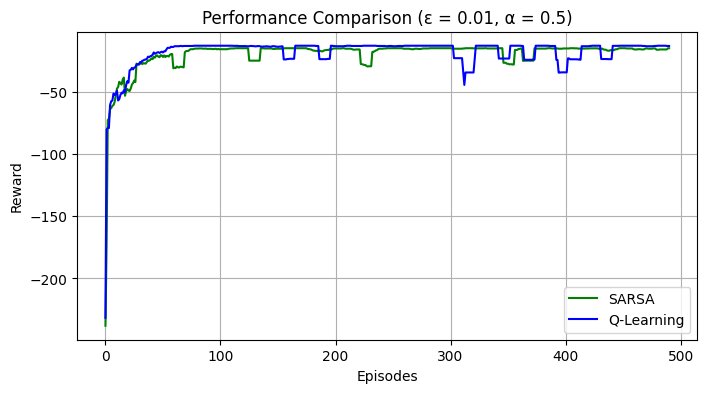

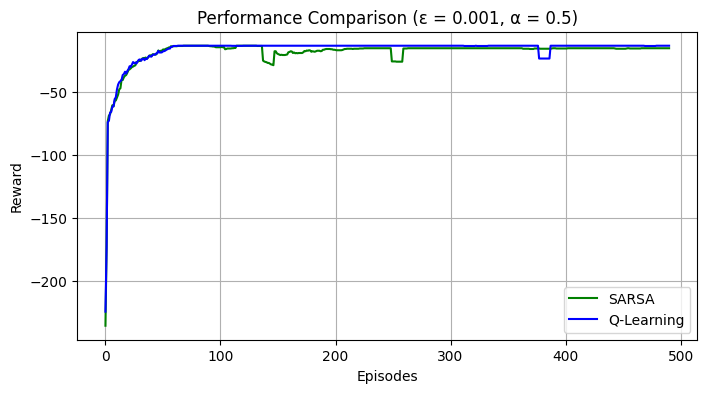

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
ROWS = 4
COLS = 12
START = (0,0)
GOAL = (0,11)
ACTIONS = {0:(1,0),1:(-1,0),2:(0,-1),3:(0,1)}
def is_cliff(r, c):
    return (r == 0 and 1 <= c <= 10)
def step(state, action):
    r, c = state
    dr, dc = ACTIONS[action]
    nr = r + dr
    nc = c + dc
    nr = max(0, min(ROWS - 1, nr))
    nc = max(0, min(COLS - 1, nc))
    if is_cliff(nr, nc):
        return START, -100, False
    if (nr, nc) == GOAL:
        return (nr, nc), -1, True
    return (nr, nc), -1, False
def choose_action(Q, state, epsilon):
    if random.random() < epsilon:
        return random.randint(0, 3)
    else:
        return np.argmax(Q[state])
def sarsa(epsilon, alpha, num_episodes=500):
    Q = {(r, c): [0.0,0.0,0.0,0.0] for r in range(ROWS) for c in range(COLS)}
    episode_rewards = []
    for ep in range(num_episodes):
        state = START
        action = choose_action(Q, state, epsilon)
        total_reward = 0
        while True:
            next_state, reward, done = step(state, action)
            total_reward += reward
            if not done:
                next_action = choose_action(Q, next_state, epsilon)
                Q[state][action] += alpha * (reward + Q[next_state][next_action] - Q[state][action])
            else:
                Q[state][action] += alpha * (reward - Q[state][action])
                break
            state, action = next_state, next_action
        episode_rewards.append(total_reward)
    return Q, episode_rewards
def q_learning(epsilon, alpha, num_episodes=500):
    Q = {(r, c): [0.0,0.0,0.0,0.0] for r in range(ROWS) for c in range(COLS)}
    episode_rewards = []
    for ep in range(num_episodes):
        state = START
        total_reward = 0
        while True:
            action = choose_action(Q, state, epsilon)
            next_state, reward, done = step(state, action)
            total_reward += reward
            if not done:
                max_next = max(Q[next_state])
                Q[state][action] += alpha * (reward + max_next - Q[state][action])
                state = next_state
            else:
                Q[state][action] += alpha * (reward - Q[state][action])
                break
        episode_rewards.append(total_reward)
    return Q, episode_rewards
def moving_average(data, window=10):
    return np.convolve(data, np.ones(window)/window, mode='valid')
if __name__ == "__main__":
    epsilons = [0.1, 0.01, 0.001]
    alpha = 0.5
    num_episodes = 500
    smoothing_window = 10
    for eps in epsilons:
        Q_sarsa, rewards_sarsa = sarsa(eps, alpha, num_episodes=num_episodes)
        Q_q, rewards_q = q_learning(eps, alpha, num_episodes=num_episodes)
        sarsa_smoothed = moving_average(rewards_sarsa, window=smoothing_window)
        q_smoothed = moving_average(rewards_q, window=smoothing_window)
        plt.figure(figsize=(8, 4))
        plt.plot(sarsa_smoothed, label='SARSA', color='green')
        plt.plot(q_smoothed, label='Q-Learning', color='blue')
        plt.xlabel('Episodes')
        plt.ylabel('Reward')
        plt.title(f'Performance Comparison (ε = {eps}, α = {alpha})')
        plt.legend()
        plt.grid(True)
        plt.show()